In [1]:
!git config --global user.name "Rawan Khaled"
!git config --global user.email "rawanemara777@gmail.com"

In [2]:
!git clone https://github.com/Sarah627/Credit-Card-Fraud-Detection.git

Cloning into 'Credit-Card-Fraud-Detection'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 34 (delta 9), reused 23 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 8.01 MiB | 8.09 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [3]:
%cd /content/Credit-Card-Fraud-Detection/

/content/Credit-Card-Fraud-Detection


In [4]:
!git checkout -b model

Switched to a new branch 'model'


In [5]:
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done

unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [6]:
!unrar x /content/Credit-Card-Fraud-Detection/cleansed_dataset.rar /content/Credit-Card-Fraud-Detection/


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/Credit-Card-Fraud-Detection/cleansed_dataset.rar

Extracting  /content/Credit-Card-Fraud-Detection/cleansed_dataset.csv      52%100%  OK 
All OK


In [8]:
!git add -f .

In [9]:
!git status

On branch model
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   cleansed_dataset.csv



In [10]:
!git commit -m "unzip the cleansed_dataset.rar"

[model 5ba3814] unzip the cleansed_dataset.rar
 1 file changed, 59409 insertions(+)
 create mode 100644 cleansed_dataset.csv


In [11]:
import pandas as pd
import numpy as np

In [12]:
dataset=pd.read_csv(r"E:\Courses\DEPI\New folder\cleansed_dataset.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.481108,0.657581,-0.424230,0.477799,-0.119148,0.673263,0.462363,0.657862,-0.378397,0.054149,...,-0.382672,-0.337321,0.048415,-0.809509,0.299729,-0.131281,-0.433776,0.025049,-0.350032,1.0
1,-0.040284,-1.244859,0.923571,-1.703976,2.375861,-0.856059,-0.547608,-1.732830,-0.473079,-2.087993,...,-2.324955,1.720734,0.754310,-1.571920,-0.611872,1.154340,1.854666,-2.884976,-0.361522,1.0
2,0.582091,-1.778840,1.815863,-1.703664,0.787731,-1.961016,-1.549548,-1.639628,2.051678,-1.136211,...,1.301630,-1.245272,-0.133151,0.379394,1.161866,-0.699387,1.278390,0.860091,0.050589,1.0
3,-0.017362,-1.312663,1.020788,-1.753761,2.370106,-0.919940,-0.578605,-1.787620,-0.387299,-2.078465,...,-2.320990,1.681640,0.783765,-1.577498,-0.534036,1.170972,1.843232,-2.896932,-0.361522,1.0
4,0.585129,-1.866470,1.865467,-1.758762,0.800600,-2.004977,-1.633239,-1.715618,2.135790,-1.114329,...,1.306632,-1.372288,-0.367747,0.416252,1.135251,-0.714324,1.270177,0.864810,0.050589,1.0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [14]:
x=dataset.drop('Class',axis=1)
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.481108,0.657581,-0.424230,0.477799,-0.119148,0.673263,0.462363,0.657862,-0.378397,0.054149,...,-0.595652,-0.382672,-0.337321,0.048415,-0.809509,0.299729,-0.131281,-0.433776,0.025049,-0.350032
1,-0.040284,-1.244859,0.923571,-1.703976,2.375861,-0.856059,-0.547608,-1.732830,-0.473079,-2.087993,...,0.754202,-2.324955,1.720734,0.754310,-1.571920,-0.611872,1.154340,1.854666,-2.884976,-0.361522
2,0.582091,-1.778840,1.815863,-1.703664,0.787731,-1.961016,-1.549548,-1.639628,2.051678,-1.136211,...,1.434297,1.301630,-1.245272,-0.133151,0.379394,1.161866,-0.699387,1.278390,0.860091,0.050589
3,-0.017362,-1.312663,1.020788,-1.753761,2.370106,-0.919940,-0.578605,-1.787620,-0.387299,-2.078465,...,0.746757,-2.320990,1.681640,0.783765,-1.577498,-0.534036,1.170972,1.843232,-2.896932,-0.361522
4,0.585129,-1.866470,1.865467,-1.758762,0.800600,-2.004977,-1.633239,-1.715618,2.135790,-1.114329,...,1.428414,1.306632,-1.372288,-0.367747,0.416252,1.135251,-0.714324,1.270177,0.864810,0.050589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59403,0.731218,-2.856424,2.625548,-2.451223,0.877367,-2.922642,-1.817475,-2.223128,3.132132,-1.000783,...,1.583241,1.350794,-2.129107,-0.456842,0.462896,1.916152,-0.669514,0.963637,0.667889,0.050589
59404,0.112249,-1.653644,1.500602,-2.002413,2.342949,-1.235434,-0.742050,-2.063723,0.042919,-2.031553,...,0.752729,-2.290691,1.484005,0.949834,-1.609900,-0.139961,1.252178,1.771516,-2.945222,-0.361522
59405,0.814434,0.489602,-0.459122,0.788668,-0.581562,0.481388,0.098490,0.747663,-0.471320,0.335100,...,-0.379977,-0.198558,0.678161,0.059724,1.779360,-0.641018,-1.262295,-0.455332,-0.236380,-0.324095
59406,-0.277322,0.652987,-0.473863,0.622695,0.014227,0.534337,0.473361,0.606501,-0.404821,0.873648,...,-0.688526,-0.609394,-0.684610,0.169946,0.503686,0.116317,-0.484123,-0.436122,0.006384,-0.349907


In [15]:
y=dataset['Class']
y

,Class
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
59403,1.0
59404,1.0
59405,0.0
59406,1.0


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
log_model=LogisticRegression(max_iter=1000)

In [18]:
log_model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [19]:
!git add -f .

In [20]:
!git status
!git commit -m "trained dataset"

On branch model
nothing to commit, working tree clean
On branch model
nothing to commit, working tree clean


In [17]:
y_pred=log_model.predict(x_test)
y_pred

array([0., 1., 0., ..., 0., 0., 1.])

In [19]:
x_train_pred=log_model.predict(x_train)
x_train_pred

array([0., 1., 0., ..., 0., 0., 0.])

In [42]:
accuracy_score(y_pred,y_test) #for test data

0.9722268978286484

In [41]:
accuracy_score(x_train_pred,y_train)

0.9704793165846063

In [43]:
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[5822,   96],
       [ 234, 5730]])

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

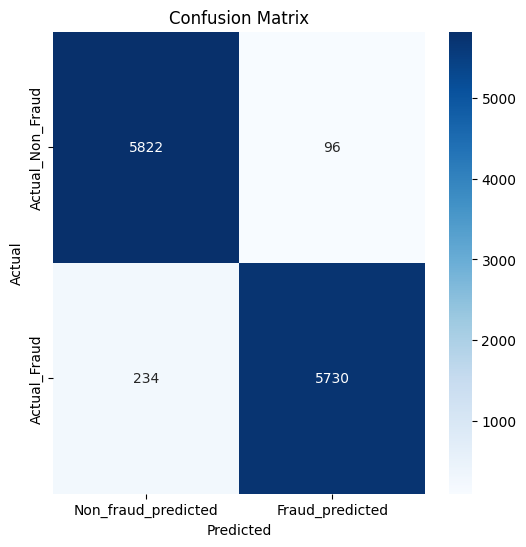

In [45]:
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix,annot=True,fmt='d', cmap='Blues',xticklabels=['Non_fraud_predicted','Fraud_predicted'],yticklabels=['Actual_Non_Fraud','Actual_Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      5918
         1.0       0.98      0.96      0.97      5964

    accuracy                           0.97     11882
   macro avg       0.97      0.97      0.97     11882
weighted avg       0.97      0.97      0.97     11882



In [46]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
RF_model=RandomForestClassifier(n_estimators=100,random_state=42)

In [51]:
RF_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [52]:
y_pred_rf=RF_model.predict(x_test)
y_pred_rf

array([0., 1., 0., ..., 0., 1., 1.])

In [53]:
x_train_pred_RF=RF_model.predict(x_train)

In [54]:
accuracy_score(y_pred_rf,y_test)

1.0

In [55]:
accuracy_score(x_train_pred_RF,y_train)

1.0

In [58]:
conf_matrix_RF=confusion_matrix(y_test,y_pred_rf)
conf_matrix_RF

array([[5918,    0],
       [   0, 5964]])

<function matplotlib.pyplot.show(close=None, block=None)>

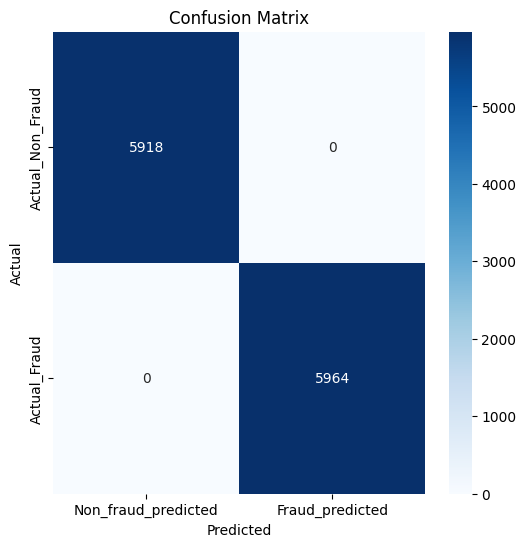

In [59]:
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_RF,annot=True,fmt='d', cmap='Blues',xticklabels=['Non_fraud_predicted','Fraud_predicted'],yticklabels=['Actual_Non_Fraud','Actual_Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show

In [60]:
from sklearn.model_selection import cross_val_score,KFold

In [61]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
Cross_Scores=cross_val_score(RF_model,x,y,cv=kf,scoring='accuracy')
Cross_Scores

array([1.        , 0.99983168, 1.        , 0.99983166, 0.99991583])

In [62]:
Cross_Scores.mean()

0.9999158348341357

In [66]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5918
         1.0       1.00      1.00      1.00      5964

    accuracy                           1.00     11882
   macro avg       1.00      1.00      1.00     11882
weighted avg       1.00      1.00      1.00     11882

